In [25]:
import sys, os
import json, pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import time as pytime
import statsmodels.tsa.stattools as tsa
import ruptures as rpt
sys.path.append('../..')
import InsanallyLabEphysTools as ilep
from scipy.stats import gaussian_kde, sem, ttest_ind, ttest_rel, norm, mannwhitneyu, linregress, wilcoxon
from tqdm import tqdm
from types import SimpleNamespace
from sklearn import linear_model
from sklearn.model_selection import KFold
import seaborn as sns
import traceback
from itertools import product
from brokenaxes import brokenaxes
import pingouin as pg
import colorsys

plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['axes.labelsize'] = 'medium'
plt.rcParams['axes.formatter.limits'] = [-2,3]
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['figure.dpi'] = '150'

#Set global font parameters
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
#Set font type to TrueType for compatibility
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

TARGET_COLOR = '#ff3654'
NONTARGET_COLOR = '#5776ff'

CR_COLOR = '#808080'
NCR_COLOR = '#FF767C'
CNO_COLOR = '#00BFFF'
SWITCH_COLOR = '#B07A3B'
LASER_COLOR = '#3375E9'
GOOD_GREY = '#969696'
GOOD_GREEN = '#32A852'
NCR_CR_cmap = mpl.colors.LinearSegmentedColormap.from_list('NCR-CR color map', [NCR_COLOR, CR_COLOR], N=1000)
PHASE_COLORS = ['#DEB9E0','#B78AB9','#906D92','#ABC5E8','#869BB7','#5E6C80']#,'#6ded94','#50d979','#36bf5f']

# dualanimalnames = ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108']
# danimals = ['DS_15','DS_19','DS_24','DS_27','DS_28']

# retroanimals = ['PB_86','BS_86','PB_92','BS_92','BS_100','BS_103','BS_111','BS_119','BS_123','BS_128','BS_131','BS_139','BS_163','BS_165']
# did_learn = ['BS_92','BS_103','BS_111','BS_179']
# did_not_learn = ['BS_86','BS_100','BS_119','BS_123','BS_128','BS_131','BS_163','BS_174']
# indeterminate = ['BS_139','BS_165','BS_191','BS_192']

# dualanimalnames = ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108']#,'DS_15','DS_19']
# opsinanimalnames = ['BS_86','BS_92','BS_100','BS_103','BS_111','BS_119','BS_123','BS_128','BS_131','BS_139','BS_163','BS_165','BS_174','BS_179','BS_191','BS_192']
# tuninganimalnames = ['BS_173','BS_175','BS_187','BS_188','BS_213','BS_214','TH_217','AE_235','AE_236','TH_237']
# unuseddualanimals = ['BS_78']
# danimals = ['DS_15','DS_19','DS_24','DS_27','DS_28','DS_16','DS_17','DS_22','DS_13','DS_23']

# animals = np.concatenate((dualanimalnames,['DS_15','DS_19']))#danimals))
# animalsext = np.concatenate((dualanimalnames,['DS_15','DS_19'],['AE_238','AE_239']))#danimals))



# animals = ['BS_173','BS_175','BS_187','BS_188','BS_213','BS_214','AE_235','AE_236','TH_237'] #V0
animals = ['BS_173','BS_175','BS_187','BS_188','BS_213','BS_214','AE_235','AE_236','TH_237','AE_252']#,'AE_254'] #V1


#act_directory = 'D:\\Analysis_Cache_archived_Oct_27_2022'
# act_directory = 'D:\\Analysis_Cache'
# ops_directory = 'D:\\Opsin_Cache'
# beh_directory = 'P:\\Behavioor'

stim25sdecodingfilename = 'D:\\stimdecoding_25s.csv'
stim25sopsinondecodingfilename = 'D:\\stimdecoding_25s_opsin_on.csv'
stim25sopsinoffdecodingfilename = 'D:\\stimdecoding_25s_opsin_off.csv'

# act_directory = 'C:\\Users\insan\\Desktop\\Analysis_Cache_Aug23'
act_directory = 'D:\\Analysis_Cache'
beh_directory = 'P:\\Behavioor'

current_version = 0 #July 6th, 2023
current_version = 1 #July 20th, 2023
current_version = 2 #July 25th, 2023
current_version = 3 #Aug 3rd, 2023

In [2]:
animalBehaviors = ilep.getAllBehavior(beh_directory)

Fetching files for BS_51
Fetching files for BS_52
Fetching files for BS_56
Fetching files for BS_59
Fetching files for BS_61
Fetching files for BS_86
Fetching files for BS_92
Fetching files for BS_100
Fetching files for BS_103
Fetching files for BS_111
Fetching files for BS_119
Fetching files for BS_123
Fetching files for BS_128
Fetching files for BS_131
Fetching files for BS_139
Fetching files for BS_163
Fetching files for BS_165
Fetching files for BS_174
Fetching files for BS_179
Fetching files for BS_191
Fetching files for BS_192
Fetching files for BS_33
Fetching files for BS_67
Fetching files for BS_73
Fetching files for BS_78
Fetching files for BS_108
Fetching files for BS_40
Fetching files for BS_41
Fetching files for BS_42
Fetching files for BS_49
Fetching files for BS_50
Fetching files for BS_70
Fetching files for BS_72
Fetching files for BS_83


C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


Fetching files for BS_85
Fetching files for BS_87
Fetching files for BS_95
Fetching files for BS_113
Fetching files for DS_15
Fetching files for DS_16
Fetching files for DS_17
Fetching files for DS_19
Fetching files for DS_22
Fetching files for DS_23
Fetching files for DS_24
Fetching files for DS_27
Fetching files for DS_28
Fetching files for DS_13
Fetching files for BS_173
Fetching files for BS_175
Fetching files for BS_187
Fetching files for BS_188
Fetching files for BS_213
Fetching files for BS_214
Fetching files for TH_217
Fetching files for AE_235
Fetching files for AE_236
Fetching files for TH_237
Fetching files for AE_252
Fetching files for AE_254
Fetching files for AE_238
Fetching files for AE_239
Fetching files for AE_240
Fetching files for AE_267
Fetching files for AO_273
Fetching files for AO_274
Fetching files for AE_287
Fetching files for AE_301
Fetching files for AE_312
P:\Behavioor\BS_61\behavior\BS_61_42v2_reversal.txt: No columns to parse from file
P:\Behavioor\BS_103\

../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)


[ 9 10 11 12 13]
[15 16 17 18 19 20 21 23 24 25]


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

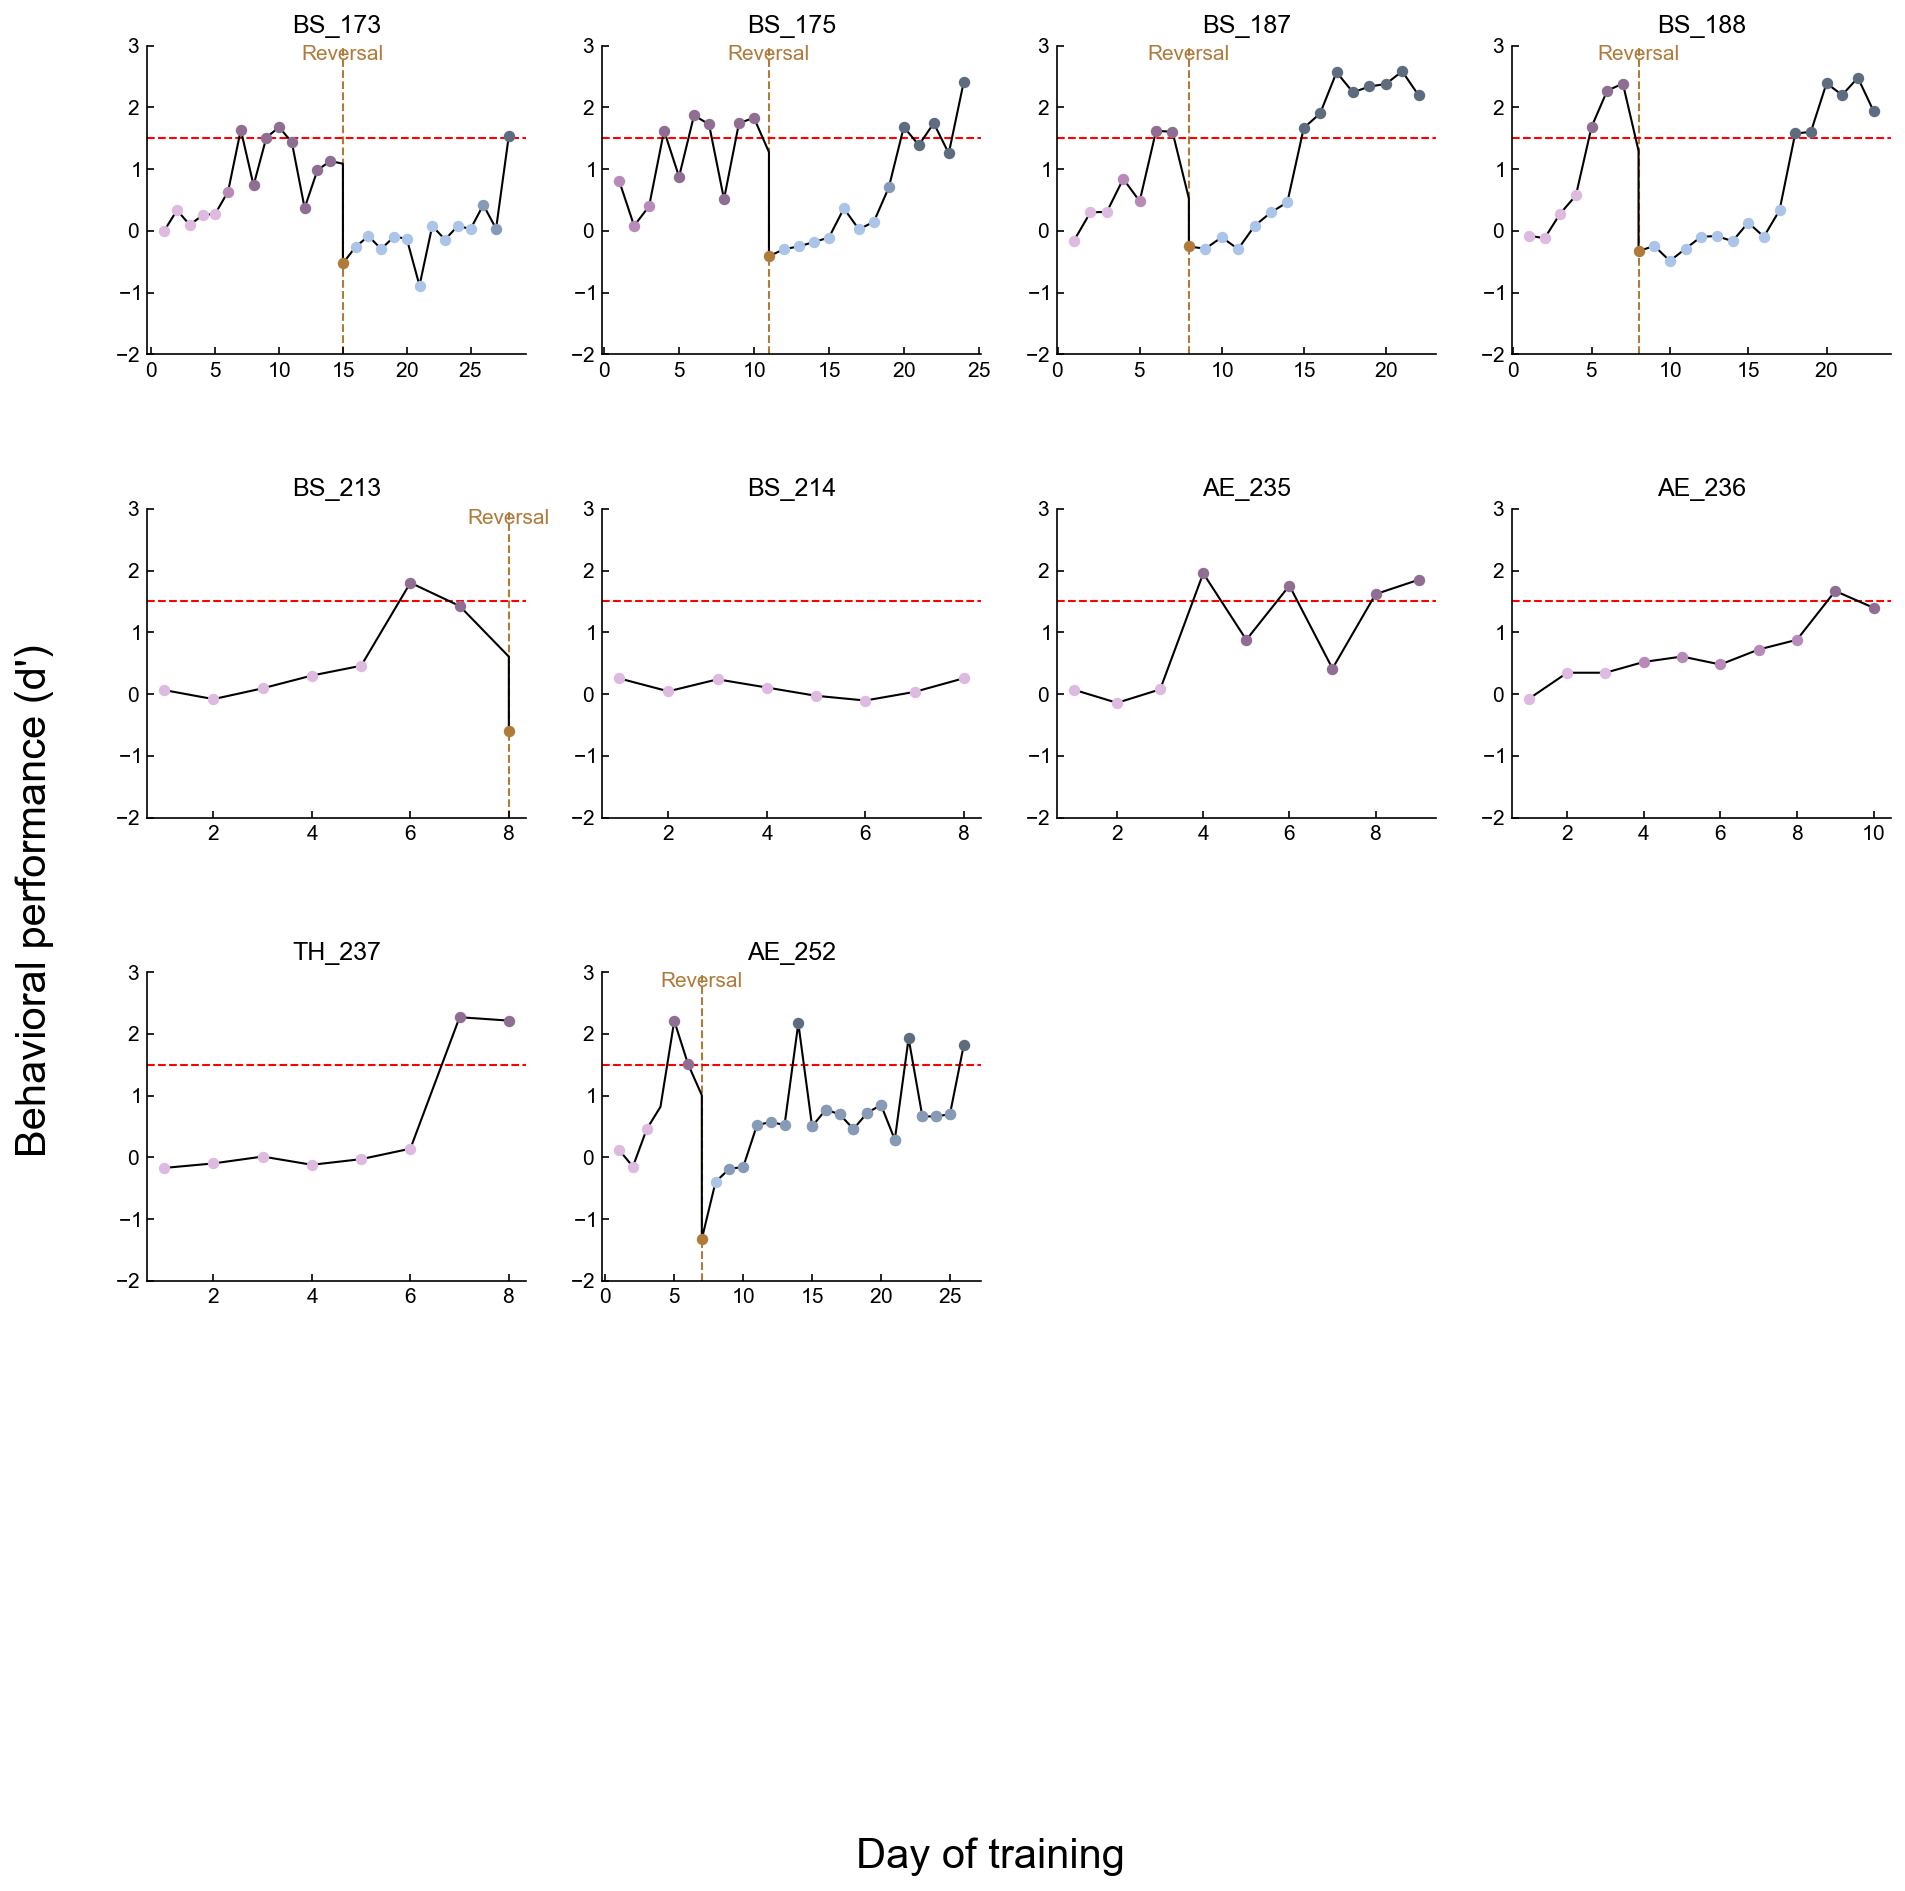

In [3]:
learning_phases,a,b = ilep.calculateLearningPhasesV2(animals,animalBehaviors,plot=True)
#plt.savefig(os.path.join('D:\\\\TempFigures','AE_252 Learning curve.pdf'),transparent=False,facecolor="white")

In [26]:
EnumSession = []
EnumClust = []
sessions = os.listdir(act_directory)
for session in tqdm(sessions):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    if sessionfile.meta.task not in ['tuning nonreversal', 'tuning switch', 'tuning reversal']:
        continue
        
    if sessionfile.meta.animal not in animals:
        continue
        
    sessionfile = ilep.determineTuningCurveTones(sessionfile)
    if ilep.testInOrderTonePresentation(sessionfile):
        continue
    for clust in sessionfile.clusters.good:
        if sessionfile.tuning.number_of_tones <= 0 or len(sessionfile.trim[clust].trimmed_tuning_trials) / len(np.unique(sessionfile.tuning.trial_freqs)) < 30:
            continue
        EnumSession.append(session)
        EnumClust.append(clust)

100%|██████████| 740/740 [00:09<00:00, 75.45it/s] 


In [27]:
EILphases = np.full_like(EnumSession,np.nan)
error_animals = []

for idx,session in enumerate(tqdm(EnumSession)):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    try:
        animal = sessionfile.meta.animal
        day = sessionfile.meta.day_of_training
        
        if sessionfile.meta.task in ['switch','opto switch','tuning switch']:
            EILphases[idx] = 'switch'

        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_early_days:
            EILphases[idx] = 'pre early'
        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal']  and day in learning_phases[animal].pre_late_days:
            EILphases[idx] = 'pre late'
        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_expert_days:
            EILphases[idx] = 'pre expert'

        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_early_days:
            EILphases[idx] = 'post early'
        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_late_days:
            EILphases[idx] = 'post late'
        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_expert_days:
            EILphases[idx] = 'post expert'
    except Exception as e:
        raise e
        #print(ilep.generateDateString(sessionfile))
        error_animals.append(sessionfile.meta.animal)
        pass
                             
error_animals = np.unique(error_animals)
print('errors for: '+str(error_animals))

100%|██████████| 1261/1261 [00:38<00:00, 33.15it/s] 

errors for: []


In [28]:
learning_phases['AE_252']

namespace(second_early_days=[],
          second_late_days=[],
          second_expert_days=[],
          post_early_days=array([8]),
          post_late_days=array([ 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25]),
          post_expert_days=array([14, 22, 26]),
          pre_early_days=array([1, 2, 3]),
          pre_late_days=array([15, 16, 17, 18, 19, 20, 21, 23, 24, 25]),
          pre_expert_days=array([5, 6]))

In [29]:
def CalculateBestFrequencies(sessionfile,clust):
    tones_to_consider = np.sort(np.unique(sessionfile.tuning.trial_freqs))
    tuning_FRs = np.full_like(tones_to_consider,np.nan)

    clust_spikes = ilep.getSpikeTimes(sessionfile,clust=clust)
    
    for idx,tone in enumerate(tones_to_consider):

        #tone_trials = np.equal(sessionfile.tuning.trial_freqs,tone)
        #tone_trials = np.where(tone_trials)[0]
        #
        #this_tone_FRs = []
        #for trial in tone_trials:

            #trialstart = sessionfile.tuning.trial_starts[trial]

            #trial_spikes = len(ilep.getSpikeTimes(sessionfile,cachedtimes = clust_spikes,starttime = trialstart, endtime = trialstart+0.2*sessionfile.meta.fs))
            #trial_FR = trial_spikes / 0.2
            #this_tone_FRs.append(trial_FR)

        ##print(str(tone) + ': ' + str(this_tone_FRs))
        #tuning_FRs[idx] = np.mean(this_tone_FRs)
        
        tuning_FRs[idx] = sessionfile.tuning.tuning_responsiveness[clust][str(tone)].FRevoked
    
    maxidxs = np.argwhere(tuning_FRs >= np.max(tuning_FRs)*1)
    best_frequencies = tones_to_consider[maxidxs]
    best_frequencies = np.concatenate(best_frequencies)
    return best_frequencies

def plotTuningCurve(sessionfile,clust):
    tones_to_use = np.sort(np.unique(sessionfile.tuning.trial_freqs))
    tuning_FRs = np.full_like(tones_to_use,np.nan)
    tuning_FR_SEMs = np.full_like(tones_to_use,np.nan)

    clust_spikes = ilep.getSpikeTimes(sessionfile,clust=clust)
    
    for idx,tone in enumerate(tones_to_use):

        tone_trials = np.equal(sessionfile.tuning.trial_freqs,tone)
        tone_trials = np.where(tone_trials)[0]

        this_tone_FRs = []
        for trial in tone_trials:

            trialstart = sessionfile.tuning.trial_starts[trial]

            trial_spikes = len(ilep.getSpikeTimes(sessionfile,cachedtimes = clust_spikes,starttime = trialstart, endtime = trialstart+0.2*sessionfile.meta.fs))
            trial_FR = trial_spikes / 0.2
            this_tone_FRs.append(trial_FR)

        #print(str(tone) + ': ' + str(this_tone_FRs))
        tuning_FRs[idx] = np.mean(this_tone_FRs)
        tuning_FR_SEMs[idx] = sem(this_tone_FRs)
        
    best_frequencies = CalculateBestFrequencies(sessionfile,clust)
    best_frequency_idxs = np.concatenate([np.argwhere(tones_to_use == f)[0] for f in best_frequencies])

    fig,ax = plt.subplots(figsize=(5,3))
    ax.plot(range(len(tuning_FRs)),tuning_FRs,color=GOOD_GREY,lw=1)
    ax.fill_between(range(len(tuning_FRs)),tuning_FRs-tuning_FR_SEMs,tuning_FRs+tuning_FR_SEMs,color=GOOD_GREY,alpha=0.125,lw=0,zorder=-10)
    ax.scatter(range(len(tuning_FRs)),tuning_FRs,color=GOOD_GREY,s=10)
    ax.scatter(best_frequency_idxs,tuning_FRs[best_frequency_idxs],color=GOOD_GREEN,s=50,zorder=10,label='best frequency')

    ax.set_xlabel('Tone Frequency (Hz)')
    ax.set_xticks(range(len(tuning_FRs)))
    ax.set_xticklabels(tones_to_use)
    ax.set_xlim([0,len(tuning_FRs)-1])

    ax.set_ylabel('Firing rate (spikes/s)')
    max_FR_value = np.max(tuning_FRs) * 1.1
    sequence_of_possible_axis_limits = np.array([1,2,4,6,8,10,12,16,20,30,40,50,60,80,100,120,140,150,160,180,200])
    idx_of_okay_limits = np.greater_equal(sequence_of_possible_axis_limits,max_FR_value)
    valid_limits = sequence_of_possible_axis_limits[idx_of_okay_limits]
    limit = np.min(valid_limits)
    ax.set_ylim([0,limit])
    ax.set_yticks([0,limit/2,limit])
    ax.set_yticklabels(['0',str(int(limit/2)),str(limit)])
    
    ax.legend(frameon=False,loc='upper right')
    
    return fig

In [39]:
pre_early_FRmod = []

pre_early_best_freqs = []
pre_early_weights = []

pre_late_best_freqs = []
pre_late_weights = []

pre_expert_best_freqs = []
pre_expert_weights = []

post_early_best_freqs = []
post_early_weights = []

post_late_best_freqs = []
post_late_weights = []

post_expert_best_freqs = []
post_expert_weights = []

for idx,(session,clust) in tqdm(enumerate(zip(EnumSession,EnumClust))):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    sessionfile = ilep.determineTuningCurveTones(sessionfile)
    
    if sessionfile.meta.region != 'AC':
        continue
        
    if sessionfile.meta.animal == 'BS_214' and sessionfile.meta.day_of_training >= 3:
        continue
        
    if ilep.testInOrderTonePresentation(sessionfile):
        continue
        
    if len(np.unique(sessionfile.tuning.trial_freqs)) < 7:
        continue
        
#     #Restrict to CRs only
#     if sessionfile.responsiveness[clust]['all_trials'].FRmodulation < 3.5:
#         continue
        
    #Restrict to NCRs only
#     if sessionfile.responsiveness[clust]['all_trials'].FRmodulation >= 3.5:
#         continue
    
    best_freqs = CalculateBestFrequencies(sessionfile,clust)
    weights = np.ones_like(best_freqs) / len(best_freqs)
    
    if EILphases[idx] == 'pre early':
        pre_early_FRmod.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        pre_early_best_freqs.append(best_freqs)
        pre_early_weights.append(weights)
    if EILphases[idx] == 'pre late':
        pre_late_best_freqs.append(best_freqs)
        pre_late_weights.append(weights)
    if EILphases[idx] == 'pre expert':
        pre_expert_best_freqs.append(best_freqs)
        pre_expert_weights.append(weights)
    if EILphases[idx] == 'post early':
        post_early_best_freqs.append(best_freqs)
        post_early_weights.append(weights)
    if EILphases[idx] == 'post late':
        post_late_best_freqs.append(best_freqs)
        post_late_weights.append(weights)
    if EILphases[idx] == 'post expert':
        post_expert_best_freqs.append(best_freqs)
        post_expert_weights.append(weights)


pre_early_best_freqs = np.concatenate(pre_early_best_freqs)
pre_early_weights = np.concatenate(pre_early_weights)
pre_late_best_freqs = np.concatenate(pre_late_best_freqs)
pre_late_weights = np.concatenate(pre_late_weights)
pre_expert_best_freqs = np.concatenate(pre_expert_best_freqs)
pre_expert_weights = np.concatenate(pre_expert_weights)
post_early_best_freqs = np.concatenate(post_early_best_freqs)
post_early_weights = np.concatenate(post_early_weights)
post_late_best_freqs = np.concatenate(post_late_best_freqs)
post_late_weights = np.concatenate(post_late_weights)
post_expert_best_freqs = np.concatenate(post_expert_best_freqs)
post_expert_weights = np.concatenate(post_expert_weights)

1261it [00:38, 32.35it/s] 


In [40]:
pre_early_best_freqs

array([22627,  4000,  8000,  4000,  8000, 16000, 22627,  8000, 22627,
       22627,  4000, 11260, 45255,  8000, 22627, 16000, 32000, 11260,
       22627, 32000, 32000, 45255, 16000, 11260, 45255, 32000, 22627,
        8000, 16000, 11260, 11260, 64000, 11260, 32000, 11260,  5648,
       32000, 16000, 32000,  8000,  4000, 64000, 16000,  4000, 64000,
        5648,  8000, 16000, 32000, 64000,  8000, 45255,  5648, 64000,
       22627,  8000,  4000,  8000, 11260, 64000, 11260, 16000, 45255,
       45255, 16000,  5648,  8000, 11260, 45255, 45255, 64000, 45255,
        5648, 11260, 22627, 22627, 64000, 45255,  5648,  5648,  8000,
        8000,  8000, 16000, 45255,  8000, 32000,  4000, 45255, 11260,
       11260, 64000,  8000,  5648,  5648, 16000,  4000, 22627,  4000,
        5648,  8000, 11260, 16000, 22627, 32000, 45255, 64000, 22627,
       64000, 32000,  4000, 45255, 16000, 16000,  5648,  5648,  8000,
        5648,  5648,  8000,  8000,  5648,  4000, 22627, 16000, 16000,
       11260, 16000,

# V3

In [32]:
stdfont = 14
stdyfrac = 0.06

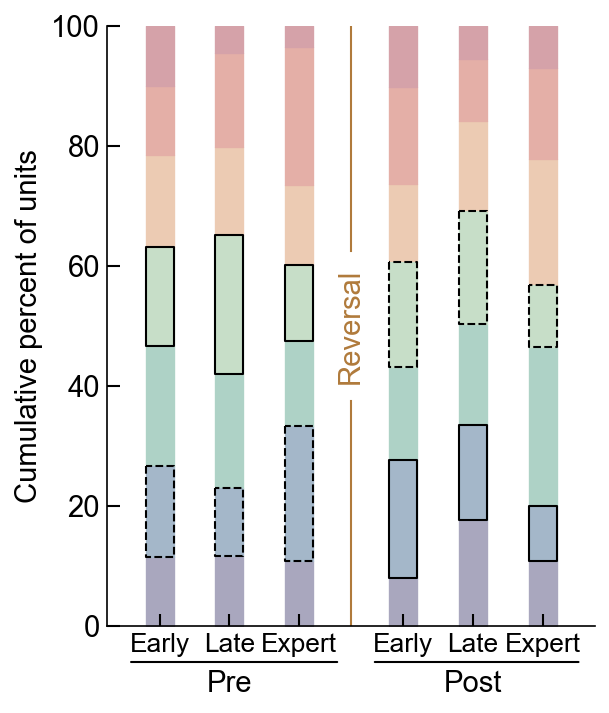

In [42]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(3.25, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25
#switch_offset = 0
################################################################################################################

#Plot figure

def plotBestFreqStack(ax,x,ylims,best_freqs,weights,width = 0.4,tntls=['-','-']):
    tones_250 = [4000,8000,16000,32000,64000]
    tones_350 = [4000,5648,8000,11260,16000,32000,64000]
    tones_450 = [4000,5648,8000,11260,16000,22627,32000,45255,64000]
    freqs_to_consider = tones_350
    cmap = mpl.cm.get_cmap('Set2')
    #colors_to_use = cmap(np.linspace(0,1,len(freqs_to_consider)))
    #colors_to_use = ['#80689D','#4D4C55','#78B0AC','#a4b49c','#76a5af','#3d85c6','#B6888E']
    colors_to_use = ['#A9A7BE','#A4B7C9','#AED2C6','#C7DEC8','#ECCBB3','#E4AFA7','#D5A2A9']
    for idx,color in enumerate(colors_to_use):
        r,g,b = mpl.colors.to_rgb(color)
        h,l,s = colorsys.rgb_to_hls(r,g,b)
        color=np.concatenate([colorsys.hls_to_rgb(h,(1-(1-l)*1)*1,s*1),[1]])
        colors_to_use[idx] = color
    #colors_to_use = mpl.colors.Colormap('plasma',len(freqs_to_consider))
    
    total_weight = 0
    for tone in freqs_to_consider:
        this_tone_idx = np.equal(best_freqs,tone)
        total_weight += np.sum(weights[this_tone_idx])
        
    current_total = 0
    last_breakpoints = []
    breakpoints = [0]
    for idx,tone in enumerate(freqs_to_consider):
        this_tone_idx = np.equal(best_freqs,tone)
        this_tone_weight = np.sum(weights[this_tone_idx])
        if tone == 5648:
            ax.fill_between([x-width/2,x+width/2],[current_total/total_weight]*2,[(current_total+this_tone_weight)/total_weight]*2,color=colors_to_use[idx],lw=0.65)
            ax.fill_between([x-width/2,x+width/2],[current_total/total_weight]*2,[(current_total+this_tone_weight)/total_weight]*2,color=colors_to_use[idx],lw=1,linestyle=tntls[0],edgecolor='k',zorder=10)#,hatch='XXXXXX'
        elif tone == 11260:
            ax.fill_between([x-width/2,x+width/2],[current_total/total_weight]*2,[(current_total+this_tone_weight)/total_weight]*2,color=colors_to_use[idx],lw=0.65)
            ax.fill_between([x-width/2,x+width/2],[current_total/total_weight]*2,[(current_total+this_tone_weight)/total_weight]*2,color=colors_to_use[idx],lw=1,linestyle=tntls[1],edgecolor='k',zorder=10)
        else:
            ax.fill_between([x-width/2,x+width/2],[current_total/total_weight]*2,[(current_total+this_tone_weight)/total_weight]*2,color=colors_to_use[idx],lw=0.65)
        current_total += this_tone_weight
        breakpoints.append(current_total)
        
    return (breakpoints/total_weight)

def plotConnectingLines(breakpre,breakpost,X,width=0.125):
    cmap = mpl.cm.get_cmap('Set2')
    #colors_to_use = ['#80689D','#4D4C55','#78B0AC','#a4b49c','#76a5af','#3d85c6','#B6888E']
    #colors_to_use = ['#b6888e','#80689D','#3d85c6','#78a5af','#78b0ac','#a4b49c','#4d4c55']
    colors_to_use = ['#A9A7BE','#A4B7C9','#AED2C6','#C7DEC8','#ECCBB3','#E4AFA7','#D5A2A9']
    for idx,color in enumerate(colors_to_use):
        r,g,b = mpl.colors.to_rgb(color)
        h,l,s = colorsys.rgb_to_hls(r,g,b)
        color=np.concatenate([colorsys.hls_to_rgb(h,(1-(1-l)*1)*1,s*1),[1]])
        colors_to_use[idx] = color
        
        Y1 = [breakpre[idx],breakpost[idx]]
        Y2 = [breakpre[idx+1],breakpost[idx+1]]
        Xplot = [X[0]+width,X[1]-width]
        
        ax.fill_between(Xplot,Y1,Y2,color=colors_to_use[idx],alpha=0.125,lw=0,zorder=-30)

breakspreEa = plotBestFreqStack(ax,0-switch_offset,[],pre_early_best_freqs,pre_early_weights,tntls=['--','-'])
breakspreLa = plotBestFreqStack(ax,1-switch_offset,[],pre_late_best_freqs,pre_late_weights,tntls=['--','-'])
#plotConnectingLines(breakspreEa,breakspreLa,[0,1])
breakspreEx = plotBestFreqStack(ax,2-switch_offset,[],pre_expert_best_freqs,pre_expert_weights,tntls=['--','-'])
#plotConnectingLines(breakspreLa,breakspreEx,[1,2])
breakspostEa = plotBestFreqStack(ax,3+switch_offset,[],post_early_best_freqs,post_early_weights,tntls=['-','--'])
#plotConnectingLines(breakspreEx,breakspostEa,[2,3])
breakspostLa = plotBestFreqStack(ax,4+switch_offset,[],post_late_best_freqs,post_late_weights,tntls=['-','--'])
#plotConnectingLines(breakspostEa,breakspostLa,[3,4])
breakspostEx = plotBestFreqStack(ax,5+switch_offset,[],post_expert_best_freqs,post_expert_weights,tntls=['-','--'])
#plotConnectingLines(breakspostLa,breakspostEx,[4,5])

tones_250 = [4000,8000,16000,32000,64000]
tones_350 = [4000,5648,8000,11260,16000,32000,64000]
tones_450 = [4000,5648,8000,11260,16000,22627,32000,45255,64000]
tones_to_use = tones_350
cmap = mpl.cm.get_cmap('Set2')
colors_to_use = ['#A9A7BE','#A4B7C9','#AED2C6','#C7DEC8','#ECCBB3','#E4AFA7','#D5A2A9']
for idx,tone in enumerate(tones_to_use):
    ax.fill_between([],[],[],color = colors_to_use[idx],label=str(np.floor(tone/100)/10),lw=0.65)
ax.fill_between([],[],[],color = 'white', ec = 'k', lw=0.65, linestyle='-',label='target')
ax.fill_between([],[],[],color = 'white', ec = 'k', lw=0.65, linestyle='--',label='non-target')

################################################################################################################

labels = ['Early','Late','Expert','Early','Late','Expert']

ax.set_ylim([0,1])
ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
ax.set_yticklabels(['0','20','40','60','80','100'])
ylab = ax.set_ylabel('Cumulative percent of units')

ax.set_xlim([-0.75-switch_offset,5.75+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)
# xlab = ax.set_xlabel('Example X label')

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.04, -stdyfrac), xycoords='axes fraction', xytext=(0.48, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.54, -stdyfrac), xycoords='axes fraction', xytext=(0.975, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
Y = np.mean(ax.get_ylim())
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Best Frequency Tuning V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')
# fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','CR Best Frequency Tuning V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')
# fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','NCR Best Frequency Tuning V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

# V2

meta NOT subset; don't know how to subset; dropped


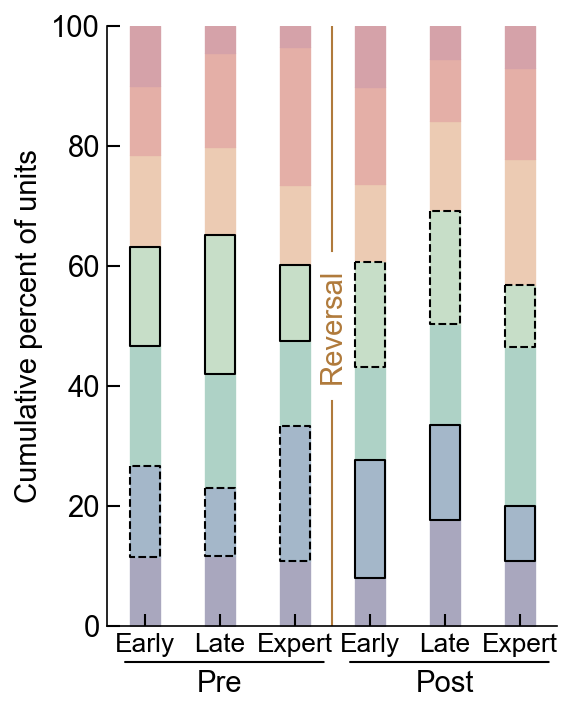

In [16]:

stdfont = 14
stdyfrac = 0.06

def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(3, 4, left=.3, bottom=.3, right=0, top=0)

################################################################################################################

#Plot figure

def plotBestFreqStack(ax,x,ylims,best_freqs,weights,width = 0.4,tntls=['-','-']):
    tones_250 = [4000,8000,16000,32000,64000]
    tones_350 = [4000,5648,8000,11260,16000,32000,64000]
    tones_450 = [4000,5648,8000,11260,16000,22627,32000,45255,64000]
    freqs_to_consider = tones_350
    cmap = mpl.cm.get_cmap('Set2')
    #colors_to_use = cmap(np.linspace(0,1,len(freqs_to_consider)))
    #colors_to_use = ['#80689D','#4D4C55','#78B0AC','#a4b49c','#76a5af','#3d85c6','#B6888E']
    colors_to_use = ['#A9A7BE','#A4B7C9','#AED2C6','#C7DEC8','#ECCBB3','#E4AFA7','#D5A2A9']
    for idx,color in enumerate(colors_to_use):
        r,g,b = mpl.colors.to_rgb(color)
        h,l,s = colorsys.rgb_to_hls(r,g,b)
        color=np.concatenate([colorsys.hls_to_rgb(h,(1-(1-l)*1)*1,s*1),[1]])
        colors_to_use[idx] = color
    #colors_to_use = mpl.colors.Colormap('plasma',len(freqs_to_consider))
    
    total_weight = 0
    for tone in freqs_to_consider:
        this_tone_idx = np.equal(best_freqs,tone)
        total_weight += np.sum(weights[this_tone_idx])
        
    current_total = 0
    last_breakpoints = []
    breakpoints = [0]
    for idx,tone in enumerate(freqs_to_consider):
        this_tone_idx = np.equal(best_freqs,tone)
        this_tone_weight = np.sum(weights[this_tone_idx])
        if tone == 5648:
            ax.fill_between([x-width/2,x+width/2],[current_total/total_weight]*2,[(current_total+this_tone_weight)/total_weight]*2,color=colors_to_use[idx],lw=0.65)
            ax.fill_between([x-width/2,x+width/2],[current_total/total_weight]*2,[(current_total+this_tone_weight)/total_weight]*2,color=colors_to_use[idx],lw=1,linestyle=tntls[0],edgecolor='k',zorder=10)#,hatch='XXXXXX'
        elif tone == 11260:
            ax.fill_between([x-width/2,x+width/2],[current_total/total_weight]*2,[(current_total+this_tone_weight)/total_weight]*2,color=colors_to_use[idx],lw=0.65)
            ax.fill_between([x-width/2,x+width/2],[current_total/total_weight]*2,[(current_total+this_tone_weight)/total_weight]*2,color=colors_to_use[idx],lw=1,linestyle=tntls[1],edgecolor='k',zorder=10)
        else:
            ax.fill_between([x-width/2,x+width/2],[current_total/total_weight]*2,[(current_total+this_tone_weight)/total_weight]*2,color=colors_to_use[idx],lw=0.65)
        current_total += this_tone_weight
        breakpoints.append(current_total)
        
    return (breakpoints/total_weight)

def plotConnectingLines(breakpre,breakpost,X,width=0.125):
    cmap = mpl.cm.get_cmap('Set2')
    #colors_to_use = ['#80689D','#4D4C55','#78B0AC','#a4b49c','#76a5af','#3d85c6','#B6888E']
    #colors_to_use = ['#b6888e','#80689D','#3d85c6','#78a5af','#78b0ac','#a4b49c','#4d4c55']
    colors_to_use = ['#A9A7BE','#A4B7C9','#AED2C6','#C7DEC8','#ECCBB3','#E4AFA7','#D5A2A9']
    for idx,color in enumerate(colors_to_use):
        r,g,b = mpl.colors.to_rgb(color)
        h,l,s = colorsys.rgb_to_hls(r,g,b)
        color=np.concatenate([colorsys.hls_to_rgb(h,(1-(1-l)*1)*1,s*1),[1]])
        colors_to_use[idx] = color
        
        Y1 = [breakpre[idx],breakpost[idx]]
        Y2 = [breakpre[idx+1],breakpost[idx+1]]
        Xplot = [X[0]+width,X[1]-width]
        
        ax.fill_between(Xplot,Y1,Y2,color=colors_to_use[idx],alpha=0.125,lw=0,zorder=-30)

breakspreEa = plotBestFreqStack(ax,0,[],pre_early_best_freqs,pre_early_weights,tntls=['--','-'])
breakspreLa = plotBestFreqStack(ax,1,[],pre_late_best_freqs,pre_late_weights,tntls=['--','-'])
#plotConnectingLines(breakspreEa,breakspreLa,[0,1])
breakspreEx = plotBestFreqStack(ax,2,[],pre_expert_best_freqs,pre_expert_weights,tntls=['--','-'])
#plotConnectingLines(breakspreLa,breakspreEx,[1,2])
breakspostEa = plotBestFreqStack(ax,3,[],post_early_best_freqs,post_early_weights,tntls=['-','--'])
#plotConnectingLines(breakspreEx,breakspostEa,[2,3])
breakspostLa = plotBestFreqStack(ax,4,[],post_late_best_freqs,post_late_weights,tntls=['-','--'])
#plotConnectingLines(breakspostEa,breakspostLa,[3,4])
breakspostEx = plotBestFreqStack(ax,5,[],post_expert_best_freqs,post_expert_weights,tntls=['-','--'])
#plotConnectingLines(breakspostLa,breakspostEx,[4,5])

tones_250 = [4000,8000,16000,32000,64000]
tones_350 = [4000,5648,8000,11260,16000,32000,64000]
tones_450 = [4000,5648,8000,11260,16000,22627,32000,45255,64000]
tones_to_use = tones_350
cmap = mpl.cm.get_cmap('Set2')
colors_to_use = ['#A9A7BE','#A4B7C9','#AED2C6','#C7DEC8','#ECCBB3','#E4AFA7','#D5A2A9']
for idx,tone in enumerate(tones_to_use):
    ax.fill_between([],[],[],color = colors_to_use[idx],label=str(np.floor(tone/100)/10),lw=0.65)
ax.fill_between([],[],[],color = 'white', ec = 'k', lw=0.65, linestyle='-',label='target')
ax.fill_between([],[],[],color = 'white', ec = 'k', lw=0.65, linestyle='--',label='non-target')

################################################################################################################

labels = ['Early','Late','Expert','Early','Late','Expert']

ax.set_ylim([0,1])
ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
ax.set_yticklabels(['0','20','40','60','80','100'])
ylab = ax.set_ylabel('Cumulative percent of units')

numCon = 6
ax.set_xlim([-0.5,5.5])
ax.set_xticks(range(numCon))
ax.set_xticklabels(labels)
ax.set_xlim(ax.get_xlim())

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.49, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.53, -stdyfrac), xycoords='axes fraction', xytext=(0.99, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))


ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
Y = np.mean(ax.get_ylim())
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y-Y*0.25],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y+Y*0.25],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2]

fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\Figure2\\Best frequency over learning.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

# V1

TypeError: only integer scalar arrays can be converted to a scalar index

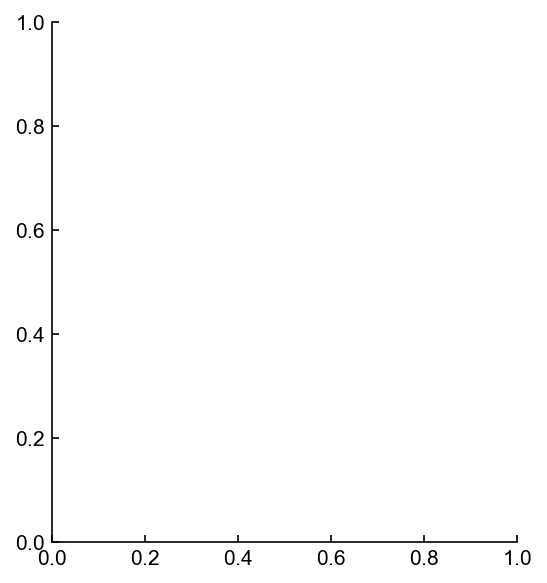

In [10]:
def plotBestFreqStack(ax,x,ylims,best_freqs,weights,width = 0.4,tntls=['-','-']):
    tones_250 = [4000,8000,16000,32000,64000]
    tones_350 = [4000,5648,8000,11260,16000,32000,64000]
    tones_450 = [4000,5648,8000,11260,16000,22627,32000,45255,64000]
    freqs_to_consider = tones_350
    cmap = mpl.cm.get_cmap('Set2')
    #colors_to_use = cmap(np.linspace(0,1,len(freqs_to_consider)))
    #colors_to_use = ['#80689D','#4D4C55','#78B0AC','#a4b49c','#76a5af','#3d85c6','#B6888E']
    colors_to_use = ['#A9A7BE','#A4B7C9','#AED2C6','#C7DEC8','#ECCBB3','#E4AFA7','#D5A2A9']
    for idx,color in enumerate(colors_to_use):
        r,g,b = mpl.colors.to_rgb(color)
        h,l,s = colorsys.rgb_to_hls(r,g,b)
        color=np.concatenate([colorsys.hls_to_rgb(h,(1-(1-l)*1)*1,s*1),[1]])
        colors_to_use[idx] = color
    #colors_to_use = mpl.colors.Colormap('plasma',len(freqs_to_consider))
    
    total_weight = 0
    for tone in freqs_to_consider:
        this_tone_idx = np.equal(best_freqs,tone)
        total_weight += np.sum(weights[this_tone_idx])
        
    current_total = 0
    last_breakpoints = []
    breakpoints = [0]
    for idx,tone in enumerate(freqs_to_consider):
        this_tone_idx = np.equal(best_freqs,tone)
        this_tone_weight = np.sum(weights[this_tone_idx])
        if tone == 5648:
            ax.fill_between([x-width/2,x+width/2],[current_total/total_weight]*2,[(current_total+this_tone_weight)/total_weight]*2,color=colors_to_use[idx],lw=0.65)
            ax.fill_between([x-width/2,x+width/2],[current_total/total_weight]*2,[(current_total+this_tone_weight)/total_weight]*2,color=colors_to_use[idx],lw=1,linestyle=tntls[0],edgecolor='k',zorder=10)#,hatch='XXXXXX'
        elif tone == 11260:
            ax.fill_between([x-width/2,x+width/2],[current_total/total_weight]*2,[(current_total+this_tone_weight)/total_weight]*2,color=colors_to_use[idx],lw=0.65)
            ax.fill_between([x-width/2,x+width/2],[current_total/total_weight]*2,[(current_total+this_tone_weight)/total_weight]*2,color=colors_to_use[idx],lw=1,linestyle=tntls[1],edgecolor='k',zorder=10)
        else:
            ax.fill_between([x-width/2,x+width/2],[current_total/total_weight]*2,[(current_total+this_tone_weight)/total_weight]*2,color=colors_to_use[idx],lw=0.65)
        current_total += this_tone_weight
        breakpoints.append(current_total)
        
    return (breakpoints/total_weight)

def plotConnectingLines(breakpre,breakpost,X,width=0.125):
    cmap = mpl.cm.get_cmap('Set2')
    #colors_to_use = ['#80689D','#4D4C55','#78B0AC','#a4b49c','#76a5af','#3d85c6','#B6888E']
    #colors_to_use = ['#b6888e','#80689D','#3d85c6','#78a5af','#78b0ac','#a4b49c','#4d4c55']
    colors_to_use = ['#A9A7BE','#A4B7C9','#AED2C6','#C7DEC8','#ECCBB3','#E4AFA7','#D5A2A9']
    for idx,color in enumerate(colors_to_use):
        r,g,b = mpl.colors.to_rgb(color)
        h,l,s = colorsys.rgb_to_hls(r,g,b)
        color=np.concatenate([colorsys.hls_to_rgb(h,(1-(1-l)*1)*1,s*1),[1]])
        colors_to_use[idx] = color
        
        Y1 = [breakpre[idx],breakpost[idx]]
        Y2 = [breakpre[idx+1],breakpost[idx+1]]
        Xplot = [X[0]+width,X[1]-width]
        
        ax.fill_between(Xplot,Y1,Y2,color=colors_to_use[idx],alpha=0.125,lw=0,zorder=-30)

fig, ax = plt.subplots(figsize=(4,4.5))
#fig,ax = plt.subplots(figsize=(4,3))
breakspreEa = plotBestFreqStack(ax,0,[],pre_early_best_freqs,pre_early_weights,tntls=['--','-'])
breakspreLa = plotBestFreqStack(ax,1,[],pre_late_best_freqs,pre_late_weights,tntls=['--','-'])
#plotConnectingLines(breakspreEa,breakspreLa,[0,1])
breakspreEx = plotBestFreqStack(ax,2,[],pre_expert_best_freqs,pre_expert_weights,tntls=['--','-'])
#plotConnectingLines(breakspreLa,breakspreEx,[1,2])
breakspostEa = plotBestFreqStack(ax,3,[],post_early_best_freqs,post_early_weights,tntls=['-','--'])
#plotConnectingLines(breakspreEx,breakspostEa,[2,3])
breakspostLa = plotBestFreqStack(ax,4,[],post_late_best_freqs,post_late_weights,tntls=['-','--'])
#plotConnectingLines(breakspostEa,breakspostLa,[3,4])
breakspostEx = plotBestFreqStack(ax,5,[],post_expert_best_freqs,post_expert_weights,tntls=['-','--'])
#plotConnectingLines(breakspostLa,breakspostEx,[4,5])

tones_250 = [4000,8000,16000,32000,64000]
tones_350 = [4000,5648,8000,11260,16000,32000,64000]
tones_450 = [4000,5648,8000,11260,16000,22627,32000,45255,64000]
tones_to_use = tones_350
cmap = mpl.cm.get_cmap('Set2')
colors_to_use = ['#A9A7BE','#A4B7C9','#AED2C6','#C7DEC8','#ECCBB3','#E4AFA7','#D5A2A9']
for idx,tone in enumerate(tones_to_use):
    ax.fill_between([],[],[],color = colors_to_use[idx],label=str(np.floor(tone/100)/10),lw=0.65)
ax.fill_between([],[],[],color = 'white', ec = 'k', lw=0.65, linestyle='-',label='target')
ax.fill_between([],[],[],color = 'white', ec = 'k', lw=0.65, linestyle='--',label='non-target')

labels = ['Early','Late','Expert','Early','Late','Expert']

ax.set_xlim([-0.5,5.5])
ax.set_xticks(range(6))
ax.set_xticklabels(labels)
ax.set_xlim(ax.get_xlim())
size = 5
rev = 2.5
center = np.mean(ax.get_ylim())

ax.text(rev,center,'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center',rotation=90)
ax.plot([rev,rev],[ax.get_ylim()[0],center/2],color=SWITCH_COLOR,lw=1,linestyle='-')
ax.plot([rev,rev],[center*2,ax.get_ylim()[1]],color=SWITCH_COLOR,lw=1,linestyle='-')

ax.set_ylim([0,1])
ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
ax.set_yticklabels(['0','20','40','60','80','100'])
ax.set_ylabel('Cumulative percent of units')

#ax.legend(frameon=False,loc=[1,0.35])

# ax.text(0,1.01,int(np.sum(pre_early_weights)),horizontalalignment='center',verticalalignment='bottom',fontsize=10)
# ax.text(1,1.01,int(np.sum(pre_late_weights)),horizontalalignment='center',verticalalignment='bottom',fontsize=10)
# ax.text(2,1.01,int(np.sum(pre_expert_weights)),horizontalalignment='center',verticalalignment='bottom',fontsize=10)
# ax.text(3,1.01,int(np.sum(post_early_weights)),horizontalalignment='center',verticalalignment='bottom',fontsize=10)
# ax.text(4,1.01,int(np.sum(post_late_weights)),horizontalalignment='center',verticalalignment='bottom',fontsize=10)
# ax.text(5,1.01,int(np.sum(post_expert_weights)),horizontalalignment='center',verticalalignment='bottom',fontsize=10)

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
ax.text(xtick_pos_pre, -0.13304656298982956/1.5, 'Pre', ha='center', va='top', fontsize=14)
ax.text(xtick_pos_post, -0.13304656298982956/1.5, 'Post', ha='center', va='top',  fontsize=14)
ax.annotate('', xy=(0.03, -0.07), xycoords='axes fraction', xytext=(0.485, -0.07),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.53, -0.07), xycoords='axes fraction', xytext=(0.985, -0.07),arrowprops=dict(arrowstyle='-', color='black'))

plt.tight_layout()


#fig.savefig(os.path.join('/Users/InsanallyLab/Desktop/Tiange Mac Folder/Figures','Best frequency over learning with TH_217.pdf'),transparent=False,facecolor="white")
#fig.savefig(os.path.join ('C:\\Users\insan\\Desktop\\Figure2\\Best frequency over learning.pdf'),transparent=False,facecolor="white")
#fig.savefig(os.path.join('D:\\\\Figures','Automated Behavior Figures','Automated best frequency over learning LEGEND.pdf'),transparent=False,facecolor="white")
#fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Best frequency over learning.pdf'),transparent=False,facecolor="white")

# Tuning Stats

In [43]:
pre_early_best_freqs

array([22627,  4000,  8000,  4000,  8000, 16000, 22627,  8000, 22627,
       22627,  4000, 11260, 45255,  8000, 22627, 16000, 32000, 11260,
       22627, 32000, 32000, 45255, 16000, 11260, 45255, 32000, 22627,
        8000, 16000, 11260, 11260, 64000, 11260, 32000, 11260,  5648,
       32000, 16000, 32000,  8000,  4000, 64000, 16000,  4000, 64000,
        5648,  8000, 16000, 32000, 64000,  8000, 45255,  5648, 64000,
       22627,  8000,  4000,  8000, 11260, 64000, 11260, 16000, 45255,
       45255, 16000,  5648,  8000, 11260, 45255, 45255, 64000, 45255,
        5648, 11260, 22627, 22627, 64000, 45255,  5648,  5648,  8000,
        8000,  8000, 16000, 45255,  8000, 32000,  4000, 45255, 11260,
       11260, 64000,  8000,  5648,  5648, 16000,  4000, 22627,  4000,
        5648,  8000, 11260, 16000, 22627, 32000, 45255, 64000, 22627,
       64000, 32000,  4000, 45255, 16000, 16000,  5648,  5648,  8000,
        5648,  5648,  8000,  8000,  5648,  4000, 22627, 16000, 16000,
       11260, 16000,

In [14]:
pre_early_5k = []
pre_early_11k = []
pre_late_5k = []
pre_late_11k = []
pre_expert_5k = []
pre_expert_11k = []
post_early_5k = []
post_early_11k = []
post_late_5k = []
post_late_11k = []
post_expert_5k = []
post_expert_11k = []

for animal in animals:
    print(animal)
    
    pre_early_best_freqs = []
    pre_early_weights = []
    pre_late_best_freqs = []
    pre_late_weights = []
    pre_expert_best_freqs = []
    pre_expert_weights = []
    post_early_best_freqs = []
    post_early_weights = []
    post_late_best_freqs = []
    post_late_weights = []
    post_expert_best_freqs = []
    post_expert_weights = []

    for idx,(session,clust) in tqdm(enumerate(zip(EnumSession,EnumClust))):
        sessionfile = ilep.loadSessionCached(act_directory,session)
        sessionfile = ilep.determineTuningCurveTones(sessionfile)

        if sessionfile.meta.region != 'AC':
            continue

        if sessionfile.meta.animal != animal:
            continue

        if ilep.testInOrderTonePresentation(sessionfile):
            continue

        if len(np.unique(sessionfile.tuning.trial_freqs)) < 7:
            continue

        best_freqs = CalculateBestFrequencies(sessionfile,clust)
        weights = np.ones_like(best_freqs) / len(best_freqs)
        
        print('Success')

        if EILphases[idx] == 'pre early':
            pre_early_best_freqs.append(best_freqs)
            pre_early_weights.append(weights)
        if EILphases[idx] == 'pre late':
            pre_late_best_freqs.append(best_freqs)
            pre_late_weights.append(weights)
        if EILphases[idx] == 'pre expert':
            pre_expert_best_freqs.append(best_freqs)
            pre_expert_weights.append(weights)
        if EILphases[idx] == 'post early':
            post_early_best_freqs.append(best_freqs)
            post_early_weights.append(weights)
        if EILphases[idx] == 'post late':
            post_late_best_freqs.append(best_freqs)
            post_late_weights.append(weights)
        if EILphases[idx] == 'post expert':
            post_expert_best_freqs.append(best_freqs)
            post_expert_weights.append(weights)
            
    print(len(pre_early_best_freqs))
    print(len(pre_late_best_freqs))
    print(len(pre_expert_best_freqs))
    print(len(post_early_best_freqs))
    print(len(post_late_best_freqs))
    print(len(post_expert_best_freqs))
            
    if len(pre_early_best_freqs) > 0:
        pre_early_best_freqs = np.concatenate(pre_early_best_freqs)
        pre_early_weights = np.concatenate(pre_early_weights)
    if len(pre_late_best_freqs) > 0:
        pre_late_best_freqs = np.concatenate(pre_late_best_freqs)
        pre_late_weights = np.concatenate(pre_late_weights)
    if len(pre_expert_best_freqs) > 0:
        pre_expert_best_freqs = np.concatenate(pre_expert_best_freqs)
        pre_expert_weights = np.concatenate(pre_expert_weights)
    if len(post_early_best_freqs) > 0:
        post_early_best_freqs = np.concatenate(post_early_best_freqs)
        post_early_weights = np.concatenate(post_early_weights)
    if len(post_late_best_freqs) > 0:
        post_late_best_freqs = np.concatenate(post_late_best_freqs)
        post_late_weights = np.concatenate(post_late_weights)
    if len(post_expert_best_freqs) > 0:
        post_expert_best_freqs = np.concatenate(post_expert_best_freqs)
        post_expert_weights = np.concatenate(post_expert_weights)
    
    if len(pre_early_best_freqs) > 0:
        mask_5k = np.equal(pre_early_best_freqs,5648)
        mask_11k = np.equal(pre_early_best_freqs,11260)
        weight_5k = np.sum(pre_early_weights[mask_5k])
        weight_11k = np.sum(pre_early_weights[mask_11k])
        weight_total = np.sum(pre_early_weights)
        pre_early_5k.append(weight_5k/weight_total)
        pre_early_11k.append(weight_11k/weight_total)
    
    if len(pre_late_best_freqs) > 0:
        mask_5k = np.equal(pre_late_best_freqs,5648)
        mask_11k = np.equal(pre_late_best_freqs,11260)
        weight_5k = np.sum(pre_late_weights[mask_5k])
        weight_11k = np.sum(pre_late_weights[mask_11k])
        weight_total = np.sum(pre_late_weights)
        pre_late_5k.append(weight_5k/weight_total)
        pre_late_11k.append(weight_11k/weight_total)
        
    if len(pre_expert_best_freqs) > 0:
        mask_5k = np.equal(pre_expert_best_freqs,5648)
        mask_11k = np.equal(pre_expert_best_freqs,11260)
        weight_5k = np.sum(pre_expert_weights[mask_5k])
        weight_11k = np.sum(pre_expert_weights[mask_11k])
        weight_total = np.sum(pre_expert_weights)
        pre_expert_5k.append(weight_5k/weight_total)
        pre_expert_11k.append(weight_11k/weight_total)
        
        
    if len(post_early_best_freqs) > 0:
        mask_5k = np.equal(post_early_best_freqs,5648)
        mask_11k = np.equal(post_early_best_freqs,11260)
        weight_5k = np.sum(post_early_weights[mask_5k])
        weight_11k = np.sum(post_early_weights[mask_11k])
        weight_total = np.sum(post_early_weights)
        post_early_5k.append(weight_5k/weight_total)
        post_early_11k.append(weight_11k/weight_total)
    
    if len(post_late_best_freqs) > 0:
        mask_5k = np.equal(post_late_best_freqs,5648)
        mask_11k = np.equal(post_late_best_freqs,11260)
        weight_5k = np.sum(post_late_weights[mask_5k])
        weight_11k = np.sum(post_late_weights[mask_11k])
        weight_total = np.sum(post_late_weights)
        post_late_5k.append(weight_5k/weight_total)
        post_late_11k.append(weight_11k/weight_total)
        
    if len(post_expert_best_freqs) > 0:
        mask_5k = np.equal(post_expert_best_freqs,5648)
        mask_11k = np.equal(post_expert_best_freqs,11260)
        weight_5k = np.sum(post_expert_weights[mask_5k])
        weight_11k = np.sum(post_expert_weights[mask_11k])
        weight_total = np.sum(post_expert_weights)
        post_expert_5k.append(weight_5k/weight_total)
        post_expert_11k.append(weight_11k/weight_total)

7it [00:00, 60.33it/s]

BS_173


660it [00:19, 38.08it/s]

Success
Success
Success
Success
Success
Success


665it [00:19, 28.24it/s]

Success
Success
Success
Success


669it [00:20, 25.79it/s]

Success
Success
Success
Success
Success


675it [00:20, 25.06it/s]

Success
Success
Success
Success
Success
Success


681it [00:20, 23.87it/s]

Success
Success
Success
Success
Success


684it [00:20, 23.20it/s]

Success
Success
Success


690it [00:21, 19.28it/s]

Success
Success
Success
Success
Success


693it [00:21, 20.13it/s]

Success
Success
Success
Success
Success


699it [00:21, 21.42it/s]

Success
Success
Success
Success
Success


702it [00:21, 21.84it/s]

Success
Success
Success
Success


707it [00:22, 17.79it/s]

Success
Success
Success
Success
Success


712it [00:22, 19.20it/s]

Success
Success
Success
Success
Success


718it [00:22, 20.54it/s]

Success
Success
Success
Success


721it [00:22, 21.04it/s]

Success
Success
Success
Success
Success


728it [00:23, 23.02it/s]

Success
Success
Success
Success
Success
Success
Success
Success
Success


738it [00:23, 33.18it/s]

Success
Success
Success
Success
Success
Success
Success
Success
Success
Success


749it [00:23, 41.67it/s]

Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success


760it [00:23, 43.15it/s]

Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success


772it [00:23, 48.60it/s]

Success
Success
Success
Success
Success
Success
Success
Success


1261it [00:37, 33.66it/s] 
9it [00:00, 88.22it/s]

0
0
0
97
0
0
BS_175


781it [00:23, 48.15it/s]

Success
Success
Success
Success
Success
Success
Success
Success
Success
Success


786it [00:23, 48.01it/s]

Success
Success
Success
Success
Success
Success
Success
Success


797it [00:24, 44.04it/s]

Success
Success
Success
Success
Success
Success
Success
Success
Success
Success


809it [00:24, 48.48it/s]

Success
Success
Success
Success
Success
Success
Success
Success
Success
Success


821it [00:24, 46.76it/s]

Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success


832it [00:24, 48.58it/s]

Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success


838it [00:24, 43.88it/s]

Success
Success
Success
Success
Success
Success
Success
Success


852it [00:25, 53.01it/s]

Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success


858it [00:25, 49.49it/s]

Success
Success
Success
Success
Success
Success
Success


864it [00:25, 38.54it/s]

Success
Success
Success
Success
Success
Success
Success


873it [00:25, 37.39it/s]

Success
Success
Success
Success
Success
Success
Success
Success
Success


1261it [00:36, 34.24it/s] 
9it [00:00, 84.89it/s]

0
0
0
0
40
38
BS_187


880it [00:25, 42.77it/s]

Success
Success
Success
Success
Success


891it [00:25, 41.18it/s]

Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success


897it [00:26, 44.05it/s]

Success
Success
Success
Success
Success
Success
Success


906it [00:26, 31.77it/s]

Success
Success
Success
Success
Success
Success


910it [00:26, 30.29it/s]

Success
Success
Success
Success


917it [00:26, 24.77it/s]

Success
Success
Success
Success
Success
Success


920it [00:27, 25.48it/s]

Success
Success
Success
Success


928it [00:27, 27.46it/s]

Success
Success
Success
Success
Success
Success
Success
Success
Success


942it [00:27, 43.94it/s]

Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success


1261it [00:37, 33.96it/s] 
9it [00:00, 84.89it/s]

0
19
0
17
0
0
BS_188


884it [00:26, 33.15it/s]
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-af234360e610>", line 31, in <module>
    sessionfile = ilep.loadSessionCached(act_directory,session)
  File "../..\InsanallyLabEphysTools\io.py", line 457, in loadSessionCached
    session = pickle.load(f)
  File "C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\numeric.py", line 1855, in _frombuffer
    return frombuffer(buf, dtype=dtype).reshape(shape, order=order)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\IPython\core\interactiveshell.py", line 2061, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_t

TypeError: object of type 'NoneType' has no len()

In [15]:
print(len(pre_early_5k))
print(len(pre_early_11k))

5
5


In [16]:
print(len(pre_late_5k))
print(len(pre_late_11k))

2
2


In [17]:
print(len(pre_expert_5k))
print(len(pre_expert_11k))

2
2


In [18]:
print(len(post_early_5k))
print(len(post_early_11k))

3
3


In [19]:
print(len(post_late_5k))
print(len(post_late_11k))

2
2


In [20]:
print(len(post_expert_5k))
print(len(post_expert_11k))

3
3


In [22]:
data_dec5 = SimpleNamespace()
data_dec5.preearly = np.abs(pre_early_5k)
data_dec5.prelate = np.abs(pre_late_5k)
data_dec5.preexpert = np.abs(pre_expert_5k)
data_dec5.postearly = np.abs(post_early_5k)
data_dec5.postlate = np.abs(post_late_5k)
data_dec5.postexpert = np.abs(post_expert_5k)

data_dec11 = SimpleNamespace()
data_dec11.preearly = np.abs(pre_early_11k)
data_dec11.prelate = np.abs(pre_late_11k)
data_dec11.preexpert = np.abs(pre_expert_11k)
data_dec11.postearly = np.abs(post_early_11k)
data_dec11.postlate = np.abs(post_late_11k)
data_dec11.postexpert = np.abs(post_expert_11k)

In [23]:
ilep.nonparametricIndependentStatsCompareToPrevious(data_dec5)
pass

            Source        SS    DF        MS         F     p-unc       np2
0            phase  0.013993   3.0  0.004664  0.382227  0.767533  0.081057
1          context  0.002070   1.0  0.002070  0.169653  0.687131  0.012882
2  phase * context  0.005823   3.0  0.001941  0.159061  0.921946  0.035407
3         Residual  0.158640  13.0  0.012203       NaN       NaN       NaN

          phase         A             B     p-unc  p-corr    hedges
7   post-expert  baseline  experimental  0.800000     1.0  0.145454
8     post-late  baseline  experimental  0.800000     1.0 -0.323873
9    pre-expert  baseline  experimental  0.666667     1.0 -0.423766
10     pre-late  baseline  experimental  1.000000     1.0 -0.363861
key preearly has 5 non-nan elements
key prelate has 2 non-nan elements
key preexpert has 2 non-nan elements
key postearly has 3 non-nan elements
key postlate has 2 non-nan elements
key postexpert has 3 non-nan elements


In [24]:
ilep.nonparametricIndependentStatsCompareToPrevious(data_dec11)
pass

            Source        SS    DF        MS         F     p-unc       np2
0            phase  0.017490   3.0  0.005830  1.294903  0.317814  0.230073
1          context  0.005235   1.0  0.005235  1.162842  0.300480  0.082105
2  phase * context  0.009017   3.0  0.003006  0.667584  0.586792  0.133492
3         Residual  0.058528  13.0  0.004502       NaN       NaN       NaN

          phase         A             B  p-unc  p-corr    hedges
7   post-expert  baseline  experimental    0.2     0.8  1.414634
8     post-late  baseline  experimental    0.8     1.0  0.604880
9    pre-expert  baseline  experimental    1.0     1.0  0.165304
10     pre-late  baseline  experimental    1.0     1.0 -0.277965
key preearly has 5 non-nan elements
key prelate has 2 non-nan elements
key preexpert has 2 non-nan elements
key postearly has 3 non-nan elements
key postlate has 2 non-nan elements
key postexpert has 3 non-nan elements


In [25]:
ilep.nonparametricIndependentStatsCompareToOther(data_dec5,data_dec11)
pass

            Source        SS    DF        MS         F     p-unc       np2
0            phase  0.027153   5.0  0.005431  0.728966  0.609231  0.142127
1          context  0.008440   1.0  0.008440  1.132901  0.298701  0.048974
2  phase * context  0.022788   5.0  0.004558  0.611784  0.691902  0.122069
3         Residual  0.163891  22.0  0.007450       NaN       NaN       NaN

          phase  A  B     p-unc  p-corr    hedges
16   post-early  A  B  1.000000     1.0 -0.404300
17  post-expert  A  B  0.700000     1.0  0.633807
18    post-late  A  B  1.000000     1.0  0.288523
19    pre-early  A  B  1.000000     1.0  0.081850
20   pre-expert  A  B  0.333333     1.0  2.759664
21     pre-late  A  B  1.000000     1.0  0.015831
key preearly has 5 and 5 non-nan elements
key prelate has 2 and 2 non-nan elements
key preexpert has 2 and 2 non-nan elements
key postearly has 3 and 3 non-nan elements
key postlate has 2 and 2 non-nan elements
key postexpert has 3 and 3 non-nan elements


In [35]:
# 0.05 = *
# 0.01 = **
# 0.001 = ***
# 0.0001 = ****

In [34]:

# For the 5k tone:(nontarget for pre-reversal, target for post-reversal)
# pre-late(p=1), pre-expert(p=0.47), post-early(p=0.95),post-late(p=0.95), post-expert(p=1)

# For the 11k tone:(target for pre-reversal,nontarget for post-reversal)
# pre-late(p=1), pre-expert(p=0.47), post-early(p=0.17),post-late(p=0.23), post-expert(p=0.23)

In [ ]:
          phase         A             B     p-unc    p-corr    hedges
11   post-early  baseline  experimental  0.392857  0.952381 -0.779272
12  post-expert  baseline  experimental  1.000000  1.000000 -0.450354
13    post-late  baseline  experimental  0.571429  0.952381 -1.056598
14   pre-expert  baseline  experimental  0.095238  0.476190 -1.887628
15     pre-late  baseline  experimental  1.000000  1.000000 -0.363861

In [ ]:
          phase         A             B     p-unc    p-corr    hedges
11   post-early  baseline  experimental  0.035714  0.178571 -1.671079
12  post-expert  baseline  experimental  0.142857  0.238095  1.012373
13    post-late  baseline  experimental  0.095238  0.238095 -1.253931
14   pre-expert  baseline  experimental  0.380952  0.476190  0.170338
15     pre-late  baseline  experimental  1.000000  1.000000 -0.277965

In [29]:
### Create dataframe ###
phase = len(pre_early_5k)*["pre-late"] + len(pre_early_11k)*["pre-late"] \
    + len(pre_late_5k)*["pre-expert"] + len(pre_late_11k)*["pre-expert"] \
    + len(pre_expert_5k)*["pre-expert"] + len(pre_expert_11k)*["pre-expert"] \
    + len(post_early_5k)*["post-early"] + len(post_early_11k)*["post-early"] \
    + len(post_late_5k)*["post-late"] + len(post_late_11k)*["post-late"] \
    + len(post_expert_5k)*["post-expert"] + len(post_expert_11k)*["post-expert"]


context = len(pre_early_5k)*["5k"] + len(pre_early_11k)*["11k"] \
    + len(pre_late_5k)*["5k"] + len(pre_late_11k)*["11k"] \
    + len(pre_expert_5k)*["5k"] + len(pre_expert_11k)*["11k"] \
    + len(post_early_5k)*["5k"] + len(post_early_11k)*["11k"] \
    + len(post_late_5k)*["5k"] + len(post_late_11k)*["11k"] \
    + len(post_expert_5k)*["5k"] + len(post_expert_11k)*["11k"]

mod = (np.concatenate([pre_early_5k, pre_early_11k,
    pre_late_5k, pre_late_11k,
    pre_expert_5k, pre_expert_11k,
    post_early_5k, post_early_11k,
    post_late_5k, post_late_11k,
    post_expert_5k, post_expert_11k]))

df = pd.DataFrame({"phase": phase, "context": context, "FR_mod": mod})



### Anova ###
anova = pg.anova(data=df, dv='FR_mod', between=['phase','context'], detailed=True)
print(anova)
print()



### Create and print results ###
pairwise_mwu = pg.pairwise_tests(data=df, dv='FR_mod', between=['phase','context'], padjust="fdr_bh", parametric=False, )
print(pairwise_mwu[pairwise_mwu["Contrast"] == "phase * context"][["phase","A", "B", "p-unc", "p-corr", "hedges"]])

            Source        SS    DF        MS         F     p-unc       np2
0            phase  0.026444   4.0  0.006611  0.935088  0.460429  0.134834
1          context  0.007979   1.0  0.007979  1.128622  0.298643  0.044914
2  phase * context  0.019209   4.0  0.004802  0.679247  0.613062  0.101695
3         Residual  0.169675  24.0  0.007070       NaN       NaN       NaN

          phase    A   B     p-unc  p-corr    hedges
11   post-early  11k  5k  1.000000     1.0  0.404300
12  post-expert  11k  5k  0.700000     1.0 -0.633807
13    post-late  11k  5k  1.000000     1.0 -0.239154
14   pre-expert  11k  5k  0.685714     1.0 -0.511419
15     pre-late  11k  5k  1.000000     1.0 -0.081850


In [12]:
animals

['BS_173',
 'BS_175',
 'BS_187',
 'BS_188',
 'BS_213',
 'BS_214',
 'AE_235',
 'AE_236',
 'TH_237',
 'AE_252']

# Tuning Stats Bootstrapped

In [34]:
pre_early_best_freqs = []
pre_early_weights = []
pre_late_best_freqs = []
pre_late_weights = []
pre_expert_best_freqs = []
pre_expert_weights = []
post_early_best_freqs = []
post_early_weights = []
post_late_best_freqs = []
post_late_weights = []
post_expert_best_freqs = []
post_expert_weights = []


for animal in animals:
    
    animal_pre_early_best_freqs = []
    animal_pre_early_weights = []
    animal_pre_late_best_freqs = []
    animal_pre_late_weights = []
    animal_pre_expert_best_freqs = []
    animal_pre_expert_weights = []
    animal_post_early_best_freqs = []
    animal_post_early_weights = []
    animal_post_late_best_freqs = []
    animal_post_late_weights = []
    animal_post_expert_best_freqs = []
    animal_post_expert_weights = []
    
    for idx,(session,clust) in tqdm(enumerate(zip(EnumSession,EnumClust))):
        sessionfile = ilep.loadSessionCached(act_directory,session)
        sessionfile = ilep.determineTuningCurveTones(sessionfile)
        if sessionfile.meta.animal != animal:
            continue

        if sessionfile.meta.region != 'AC':
            continue
        if sessionfile.meta.animal == 'BS_214' and sessionfile.meta.day_of_training >= 3:
            continue
        if ilep.testInOrderTonePresentation(sessionfile):
            continue
        if len(np.unique(sessionfile.tuning.trial_freqs)) < 7:
            continue

        best_freqs = CalculateBestFrequencies(sessionfile,clust)
        weights = np.ones_like(best_freqs) / len(best_freqs)

        if EILphases[idx] == 'pre early':
            animal_pre_early_best_freqs.append(best_freqs)
            animal_pre_early_weights.append(weights)
        if EILphases[idx] == 'pre late':
            animal_pre_late_best_freqs.append(best_freqs)
            animal_pre_late_weights.append(weights)
        if EILphases[idx] == 'pre expert':
            animal_pre_expert_best_freqs.append(best_freqs)
            animal_pre_expert_weights.append(weights)
        if EILphases[idx] == 'post early':
            animal_post_early_best_freqs.append(best_freqs)
            animal_post_early_weights.append(weights)
        if EILphases[idx] == 'post late':
            animal_post_late_best_freqs.append(best_freqs)
            animal_post_late_weights.append(weights)
        if EILphases[idx] == 'post expert':
            animal_post_expert_best_freqs.append(best_freqs)
            animal_post_expert_weights.append(weights)
            
    pre_early_best_freqs.append(animal_pre_early_best_freqs)
    pre_early_weights.append(animal_pre_early_weights)
    pre_late_best_freqs.append(animal_pre_late_best_freqs)
    pre_late_weights.append(animal_pre_late_weights)
    pre_expert_best_freqs.append(animal_pre_expert_best_freqs)
    pre_expert_weights.append(animal_pre_expert_weights)
    post_early_best_freqs.append(animal_post_early_best_freqs)
    post_early_weights.append(animal_post_early_weights)
    post_late_best_freqs.append(animal_post_late_best_freqs)
    post_late_weights.append(animal_post_late_weights)
    post_expert_best_freqs.append(animal_post_expert_best_freqs)
    post_expert_weights.append(animal_post_expert_weights)


1261it [00:37, 33.34it/s] 
1261it [00:37, 33.36it/s] 
1261it [00:37, 33.56it/s] 
1261it [00:37, 33.92it/s] 
1261it [00:37, 34.02it/s] 
1261it [00:37, 33.27it/s] 
1261it [00:38, 33.06it/s] 
1261it [00:38, 32.74it/s] 
1261it [00:38, 33.00it/s] 
1261it [00:34, 36.14it/s] 


In [38]:
print('done')

done


In [231]:
p1 = bootstrap_pc_tuned_test(pre_early_best_freqs,pre_early_weights,pre_late_best_freqs,pre_late_weights,B=250000,test_freqs=[11260,11260])
p2 = bootstrap_pc_tuned_test(pre_late_best_freqs,pre_late_weights,pre_expert_best_freqs,pre_expert_weights,B=250000,test_freqs=[11260,11260])
p3 = bootstrap_pc_tuned_test(post_early_best_freqs,post_early_weights,post_late_best_freqs,post_late_weights,B=250000,test_freqs=[11260,11260])
p4 = bootstrap_pc_tuned_test(post_late_best_freqs,post_late_weights,post_expert_best_freqs,post_expert_weights,B=250000,test_freqs=[11260,11260])

p5 = bootstrap_pc_tuned_test(pre_early_best_freqs,pre_early_weights,pre_late_best_freqs,pre_late_weights,B=250000,test_freqs=[5648,5648])
p6 = bootstrap_pc_tuned_test(pre_late_best_freqs,pre_late_weights,pre_expert_best_freqs,pre_expert_weights,B=250000,test_freqs=[5648,5648])
p7 = bootstrap_pc_tuned_test(post_early_best_freqs,post_early_weights,post_late_best_freqs,post_late_weights,B=250000,test_freqs=[5648,5648])
p8 = bootstrap_pc_tuned_test(post_late_best_freqs,post_late_weights,post_expert_best_freqs,post_expert_weights,B=250000,test_freqs=[5648,5648])

_,p_corr = pg.multicomp([p1,p2,p3,p4,p5,p6,p7,p8],method='fdr_bh')
print(p_corr[0:4])
print(p_corr[4:8])

<ipython-input-221-db38f469fd10>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Xf = np.array(Xf)
<ipython-input-221-db38f469fd10>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Xw = np.array(Xw)
<ipython-input-221-db38f469fd10>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Yf = np.array(Yf)
<ipython-input-221-db38f469fd10>:

[0.0967168 0.0967168 0.640744  0.0967168]
[0.57224229 0.0967168  0.0967168  0.107552  ]


In [36]:
def bootstrap_pc_tuned_test(Xf,Xw,Yf,Yw,B=250000,test_freqs=[11260,5648]):
    #https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7906290/
    #Application of the hierarchical bootstrap to multi-level data in neuroscience
    #Saravanan et al.
    
    #Testing against the null hypothesis that these two groups are the same
    Xf = np.array(Xf)
    Xw = np.array(Xw)
    mask = np.greater([len(l) for l in Xf],0)
    Xf = Xf[mask]
    Xw = Xw[mask]
    
    Yf = np.array(Yf)
    Yw = np.array(Yw)
    mask = np.greater([len(l) for l in Yf],0)
    Yf = Yf[mask]
    Yw = Yw[mask]

    #Handle differing CR NCR Thresholds. Scale up to 2 if only one is provided
    if len(test_freqs) == 1:
        test_freqs = [test_freqs[0],test_freqs[0]]
    
    MwX_list = []
    for idx_B in range(B):
        
        this_sample_freqs = []
        this_sample_weights = []
        for f,w in zip(Xf,Xw):
            assert len(f) == len(w)
            n = len(f)
            
            ftemp = np.empty(len(f), object)
            for idx_f in range(len(f)):
                ftemp[idx_f] = f[idx_f]
            f = ftemp
            
            wtemp = np.empty(len(w), object)
            for idx_w in range(len(w)):
                wtemp[idx_w] = w[idx_w]
            w = wtemp
            
            idxs = np.random.choice(range(n),n)
            this_sample_freqs.append(f[idxs])
            this_sample_weights.append(w[idxs])
        
        this_sample_freqs = np.concatenate(np.concatenate(this_sample_freqs))
        this_sample_weights = np.concatenate(np.concatenate(this_sample_weights))
        
        matched_idx = np.equal(this_sample_freqs,test_freqs[0])
        this_pc = np.sum(this_sample_weights[matched_idx]) / np.sum(this_sample_weights)
        MwX_list.append(this_pc)
        
    MwY_list = []
    for idx_B in range(B):
        
        this_sample_freqs = []
        this_sample_weights = []
        for f,w in zip(Yf,Yw):
            assert len(f) == len(w)
            n = len(f)
            
            ftemp = np.empty(len(f), object)
            for idx_f in range(len(f)):
                ftemp[idx_f] = f[idx_f]
            f = ftemp
            
            wtemp = np.empty(len(w), object)
            for idx_w in range(len(w)):
                wtemp[idx_w] = w[idx_w]
            w = wtemp
            
            idxs = np.random.choice(range(n),n)
            this_sample_freqs.append(f[idxs])
            this_sample_weights.append(w[idxs])
        
        this_sample_freqs = np.concatenate(np.concatenate(this_sample_freqs))
        this_sample_weights = np.concatenate(np.concatenate(this_sample_weights))
        
        matched_idx = np.equal(this_sample_freqs,test_freqs[1])
        this_pc = np.sum(this_sample_weights[matched_idx]) / np.sum(this_sample_weights)
        MwY_list.append(this_pc)
        
    #Two-sided test
    diffs = (np.array(MwY_list) - np.array(MwX_list))
    pY = 1 - np.mean(np.greater(diffs,0))
    pX = 1 - np.mean(np.less(diffs,0))
    pboot = min(pX,pY)*2
    return pboot

In [201]:
post_expert_best_freqs[3]

[array([5648]), array([8000]), array([8000]), array([5648]), array([8000])]

In [203]:
np.array(post_expert_best_freqs[3],dtype='object')

array([[5648],
       [8000],
       [8000],
       [5648],
       [8000]], dtype=object)